In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
import matplotlib.pyplot as plt 
from keras.datasets import mnist 
import pandas as pd 
import numpy as np 

## Load the data

In [2]:
(x_train, y_train), (x_test , y_test)= mnist.load_data()

## Analyze the Data 

In [3]:
print('Training data shape : ',x_train.shape,y_train.shape)
print('Testing data shape : ',x_test.shape,y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# find the unique numbers from train labels 
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ',nClasses)
print('Output classes : ',classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


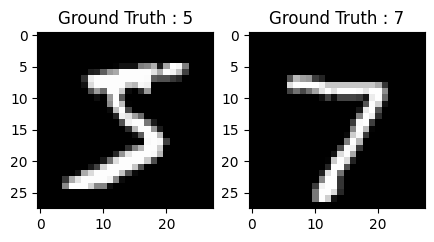

In [5]:
plt.figure(figsize=(5,5))
# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0],cmap='gray')
plt.title('Ground Truth : {}'.format(y_train[0]))
# Display the first image in testing data 
plt.subplot(122)
plt.imshow(x_test[0],cmap='gray')
plt.title('Ground Truth : {}'.format(y_test[0]))
plt.show()

## Data Preprocessing 

In [6]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# change datatype from int8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# change the labels from categorical to one-hot encoding 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
# display the change for category label using one-hot encoding 
print('original label : ',y_train[0])
print('After conversion to one-hot : ',y_train_one_hot[0])

original label :  5
After conversion to one-hot :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
x_train, x_valid, train_label, valid_label = train_test_split(x_train,
                                                              y_train_one_hot,
                                                              test_size = 0.2,
                                                              random_state=42)

In [10]:
# check the shape of training and validation data 
print(x_train.shape)
print(x_valid.shape)
print(train_label.shape)
print(valid_label.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


## The Network 
- You will use 3 convolutional layers :
- 1] First layer will have 32 - 3x3 filters
- 2] Second layer will have 64 - 3x3 filters
- 3] Third layer will have 128 - 3x3 layers
- 4] also there are 3 max-pooling layers each of size 2x2

## Model the Data

In [11]:
from keras.layers.normalization import batch_normalization 
from tensorflow.keras import Input, Model, Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import keras 

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

## Neural Network Architecture

In [14]:
digit_model = Sequential()
# first convolution layer 
digit_model.add(Conv2D(32, kernel_size=(3,3),
                       activation='linear',
                       input_shape=(28,28,1),
                       padding='same'))
digit_model.add(LeakyReLU(alpha=0.1))
# first pooling layer
digit_model.add(MaxPooling2D(pool_size=(2,2),
                             padding='same'))
# second convolution layer
digit_model.add(Conv2D(64,kernel_size=(3,3),
                       activation='linear',
                       padding='same'))
digit_model.add(LeakyReLU(alpha=0.1))
# second pooling layer
digit_model.add(MaxPooling2D(pool_size=(2,2),
                             padding='same'))
# third convolution layer 
digit_model.add(Conv2D(128,kernel_size=(3,3),
                       activation='linear',
                       padding='same'))
digit_model.add(LeakyReLU(alpha=0.1))
# third pooling layer
digit_model.add(MaxPooling2D(pool_size=(2,2),
                             padding='same'))
digit_model.add(Flatten())
# first dense layer
digit_model.add(Dense(128,activation='linear'))
digit_model.add(LeakyReLU(alpha=0.1))
# second dense layer
digit_model.add(Dense(num_classes,activation='softmax'))

## Compile the Model

In [15]:
digit_model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adam(),
                    metrics=['accuracy'])

In [16]:
# visualize the layers using summary func
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

## Train the Model 

In [18]:
digit_train = digit_model.fit(x_train,train_label,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_valid,valid_label))

Epoch 1/20
750/750 [==============================] - 55s 69ms/step - loss: 0.1631 - accuracy: 0.9498 - val_loss: 0.0860 - val_accuracy: 0.9730
Epoch 2/20
750/750 [==============================] - 56s 74ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 3/20
750/750 [==============================] - 57s 75ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 4/20
750/750 [==============================] - 56s 75ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 5/20
750/750 [==============================] - 57s 77ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0340 - val_accuracy: 0.9912
Epoch 6/20
750/750 [==============================] - 56s 75ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0395 - val_accuracy: 0.9898
Epoch 7/20
750/750 [==============================] - 56s 75ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0479 - val_accuracy:

## Model Evaluation on the Test Set 

In [20]:
test_eval = digit_model.evaluate(x_test,y_test_one_hot,
                                 verbose=0)

In [22]:
print('Test loss : ',test_eval[0]*100)
print('Test accuracy : ',test_eval[1]*100)

Test loss :  3.805563971400261
Test accuracy :  99.22999739646912


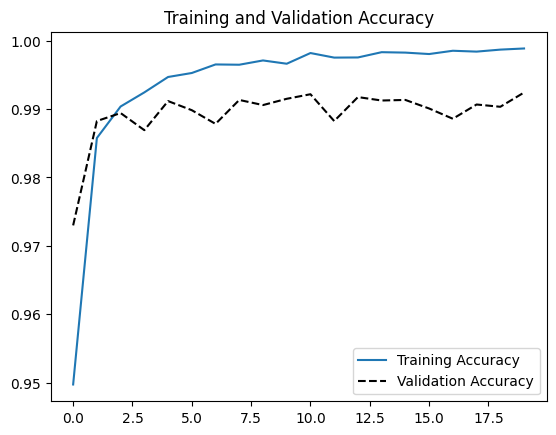

In [27]:
accuracy = digit_train.history['accuracy']
val_accuracy = digit_train.history['val_accuracy']
loss = digit_train.history['loss']
val_loss = digit_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,label='Training Accuracy')
plt.plot(epochs,val_accuracy,'k--',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

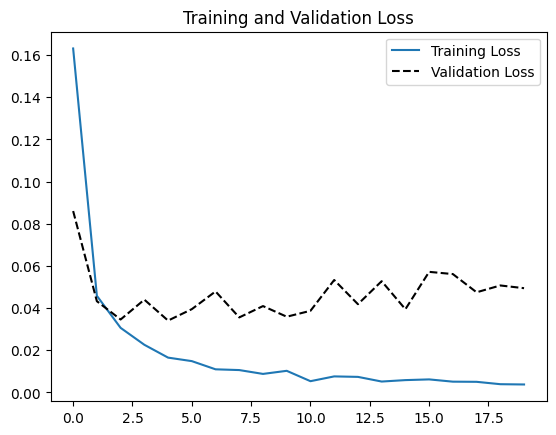

In [28]:
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,'k--',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Adding Dropout into the Network

In [29]:
batch_size = 64
epochs = 20
num_classes = 10

In [30]:
digit_model = Sequential()
# first convolution network
digit_model.add(Conv2D(32,kernel_size=(3,3),
                       activation='linear',
                       padding='same',
                       input_shape=(28,28,1)))
digit_model.add(LeakyReLU(alpha=0.1))
# first pooling layer
digit_model.add(MaxPooling2D(pool_size=(2,2),
                             padding='same'))
# first dropout layer
digit_model.add(Dropout(0.25))
# second convolution layer
digit_model.add(Conv2D(64,kernel_size=(3,3),
                       activation='linear',
                       padding='same'))
digit_model.add(LeakyReLU(alpha=0.1))
# secong pooling layer
digit_model.add(MaxPooling2D(pool_size=(2,2),
                             padding='same'))
# second dropout layer 
digit_model.add(Dropout(0.25))
# third convolution layer 
digit_model.add(Conv2D(128,kernel_size=(3,3),
                       activation='linear',
                       padding='same'))
digit_model.add(LeakyReLU(alpha=0.1))
# third pooling layer
digit_model.add(MaxPooling2D(pool_size=(2,2),
                             padding='same'))
# third dropout layer 
digit_model.add(Dropout(0.4))
digit_model.add(Flatten())
# first dense layer 
digit_model.add(Dense(128,activation='linear'))
digit_model.add(LeakyReLU(alpha=0.1))
# fourth dropout layer 
digit_model.add(Dropout(0.3))
# second Dense layer 
digit_model.add(Dense(num_classes,activation='softmax'))

In [31]:
digit_model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adam(),
                    metrics=['accuracy'])

In [32]:
# visualize the layers using summary function 
digit_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [33]:
digit_train_dropout = digit_model.fit(x_train,
                                      train_label,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      verbose=1,
                                      validation_data=(x_valid,valid_label))

Epoch 1/20
750/750 [==============================] - 61s 79ms/step - loss: 0.2749 - accuracy: 0.9106 - val_loss: 0.0645 - val_accuracy: 0.9802
Epoch 2/20
750/750 [==============================] - 77s 103ms/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.0438 - val_accuracy: 0.9878
Epoch 3/20
750/750 [==============================] - 67s 89ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 4/20
750/750 [==============================] - 75s 100ms/step - loss: 0.0563 - accuracy: 0.9825 - val_loss: 0.0473 - val_accuracy: 0.9875
Epoch 5/20
750/750 [==============================] - 85s 114ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0421 - val_accuracy: 0.9884
Epoch 6/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.0316 - val_accuracy: 0.9908
Epoch 7/20
750/750 [==============================] - 84s 112ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0312 - val_accu

## Save Model 

In [34]:
digit_model.save('digit_model_dropout.h5py')

INFO:tensorflow:Assets written to: digit_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: digit_model_dropout.h5py\assets


## Model Evaluation on the Test Set 

In [35]:
test_eval = digit_model.evaluate(x_test,y_test_one_hot,
                                 verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.0240 - accuracy: 0.9927


In [36]:
print('Test loss : ',test_eval[0]*100)
print('Test Accuracy : ',test_eval[1]*100)

Test loss :  2.3980917409062386
Test Accuracy :  99.26999807357788


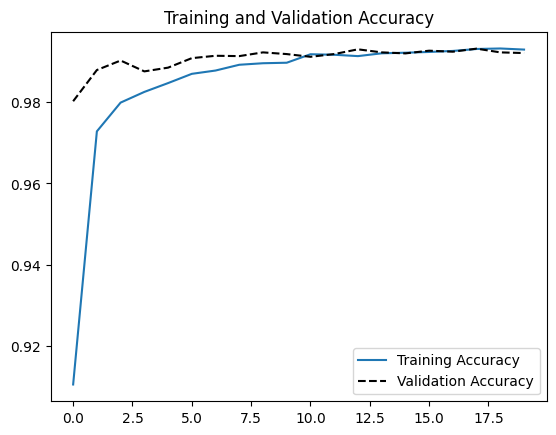

In [38]:
accuracy = digit_train_dropout.history['accuracy']
val_accuracy = digit_train_dropout.history['val_accuracy']
loss = digit_train_dropout.history['loss']
val_loss = digit_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,label='Training Accuracy')
plt.plot(epochs,val_accuracy,'k--',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

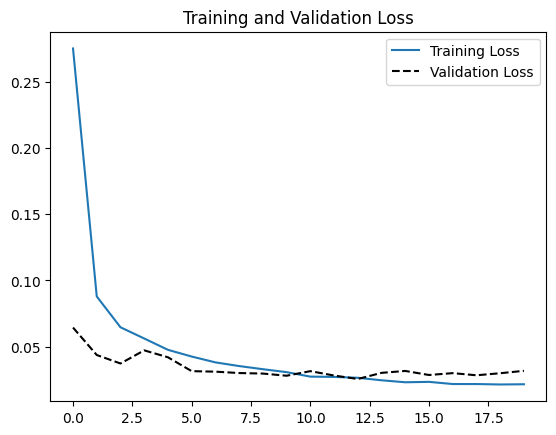

In [40]:
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,'k--',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# validation loss is decreasing and not increasing 
# also there is not much gap between training and validation accuracy.
# it shows that model is not overfitting 

## Predicted Labels

In [41]:
predicted_classes = digit_model.predict(x_test)

313/313 [==============================] - 5s 14ms/step


In [43]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [46]:
print(predicted_classes.shape)
print(y_test.shape)

(10000,)
(10000,)


Found 99% correct labels


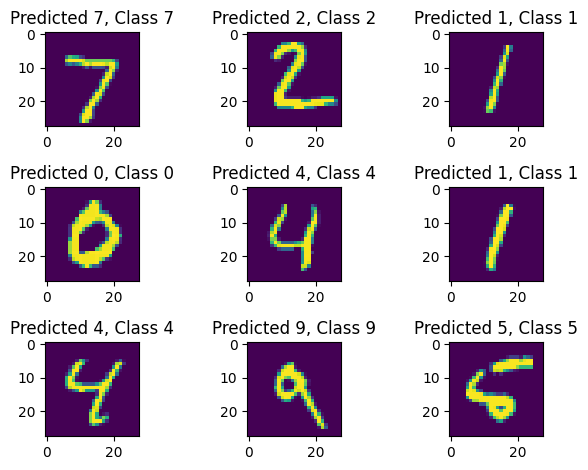

In [47]:
correct = np.where(predicted_classes == y_test)[0]
print('Found %d%% correct labels'%(len(correct)*100/len(y_test)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28),
               interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct],
                                              y_test[correct]))
plt.tight_layout()
plt.show()

Found 0% incorrect labels


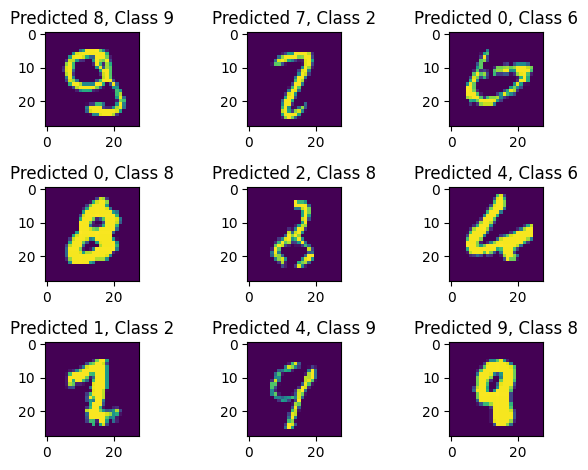

In [48]:
incorrect = np.where(predicted_classes != y_test)[0]
print('Found %d%% incorrect labels'%(len(incorrect)*100/len(y_test)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28),
               interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect],
                                              y_test[incorrect]))
plt.tight_layout()
plt.show()

## Classification Report

In [49]:
from sklearn.metrics import classification_report

In [50]:
target_names = ['Class {}'.format(i) for i in range(num_classes)]

In [52]:
print(classification_report(y_test,predicted_classes,
                            target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       1.00      0.99      1.00      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      1.00      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       0.98      0.99      0.99      1028
     Class 8       1.00      0.99      0.99       974
     Class 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Make Prediction 

In [53]:
pred1 = digit_model.predict(x_train[0].reshape(-1,28,28,1))[0]
pred2 = digit_model.predict(x_train[1].reshape(-1,28,28,1))[0]

1/1 [==============================] - 0s 40ms/step


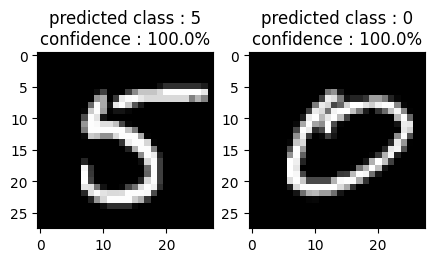

In [54]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(x_train[0],cmap='gray')
plt.title(f'predicted class : {pred1.argmax(axis=0)}\nconfidence : {round(pred1.max()*100,2)}%')
plt.subplot(122)
plt.imshow(x_train[1],cmap='gray')
plt.title(f'predicted class : {pred2.argmax(axis=0)}\nconfidence : {round(pred2.max()*100,2)}%')
plt.show()